In [1]:
from sweep_utils import * 

In [2]:
param_configs = "../param_configs/attn_fista_rho_mu_sweep_20it_prior_mv.json"
script_name = "../scripts/run_fineweb1B_adam_fista_momentum.sh"
df, missing = load_sweep_jsons(param_configs, script_name)

In [3]:
df[:5]

,path,final_train_loss,min_val_loss,fin_val_loss,kq_max,kq_median,kq_mean,attn_max_iter,attn_momentum,lr,momentum,mu_frac,rho_over_lr,warm_start
0,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.000694,3.989033,3.989033,294.0,191.0,1.999101e+02,20,prior_mv,0.001,False,0.5,0.5,False
1,/mnt/home/tparshakova/Documents/GPT-opt/output...,3.982838,3.970553,3.970553,197.0,123.5,1.227366e+02,20,prior_mv,0.001,False,0.1,0.1,False
2,/mnt/home/tparshakova/Documents/GPT-opt/output...,9.239266,9.222367,9.226735,165675008.0,164626432.0,1.507708e+08,20,prior_mv,0.001,False,0.001,50,False
3,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.525904,4.514731,4.514731,6368.0,5056.0,4.449108e+03,20,prior_mv,0.001,False,0.75,5,False
4,/mnt/home/tparshakova/Documents/GPT-opt/output...,11.813321,10.503707,11.803459,19529728.0,13238272.0,1.289172e+07,20,prior_mv,0.001,False,0.005,50,False


In [4]:
sorted(df["mu_frac"].unique()), sorted(df["rho_over_lr"].unique())

(['0.001', '0.005', '0.01', '0.05', '0.1', '0.5', '0.75'],
 ['0.01', '0.1', '0.5', '1', '10', '100', '5', '50'])

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:372: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:374: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


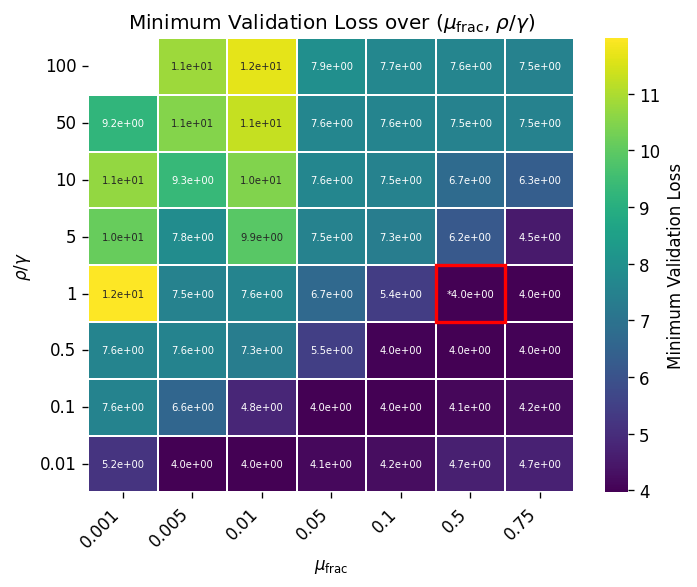

In [5]:
plot_heatmat_grid(df, value="min_val_loss")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:372: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:374: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


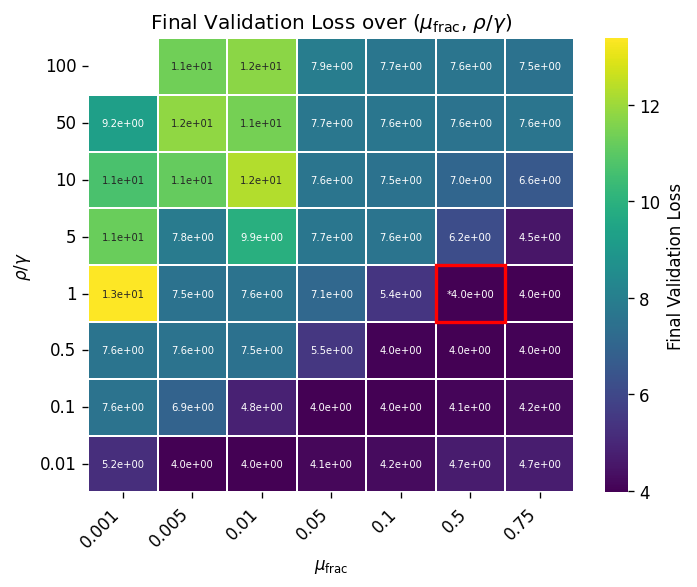

In [6]:
plot_heatmat_grid(df, value="fin_val_loss")

In [7]:
cols = ["min_val_loss", "kq_max", "mu_frac", "rho_over_lr"]
top10 = df.dropna(subset=cols).nsmallest(10, "min_val_loss")[cols].reset_index(drop=True)
print(top10)

   min_val_loss   kq_max mu_frac rho_over_lr
0      3.964207   804.00     0.5           1
1      3.964882   756.00   0.005        0.01
2      3.967524   732.00    0.05         0.1
3      3.969220   178.00    0.01        0.01
4      3.970553   197.00     0.1         0.1
5      3.989033   294.00     0.5         0.5
6      3.990592   390.00    0.75           1
7      4.014805  3328.00     0.1         0.5
8      4.022688   179.00    0.75         0.5
9      4.104201    37.75     0.5         0.1


/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:372: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:374: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


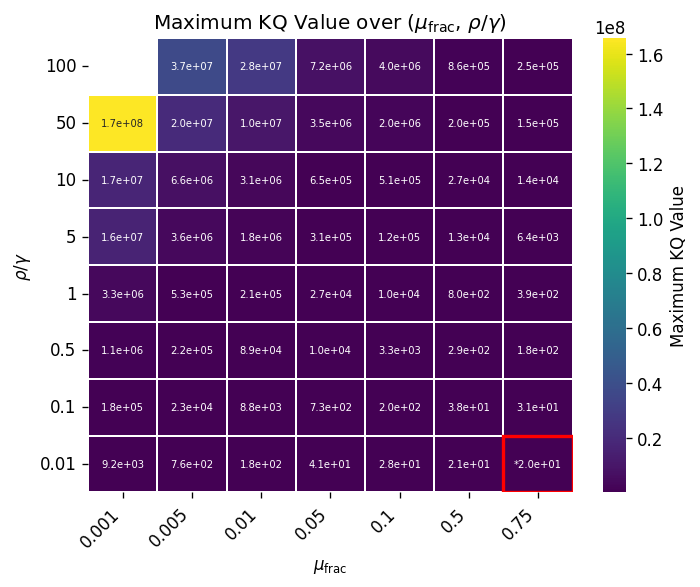

In [8]:
plot_heatmat_grid(df, value="kq_max")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:372: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:374: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


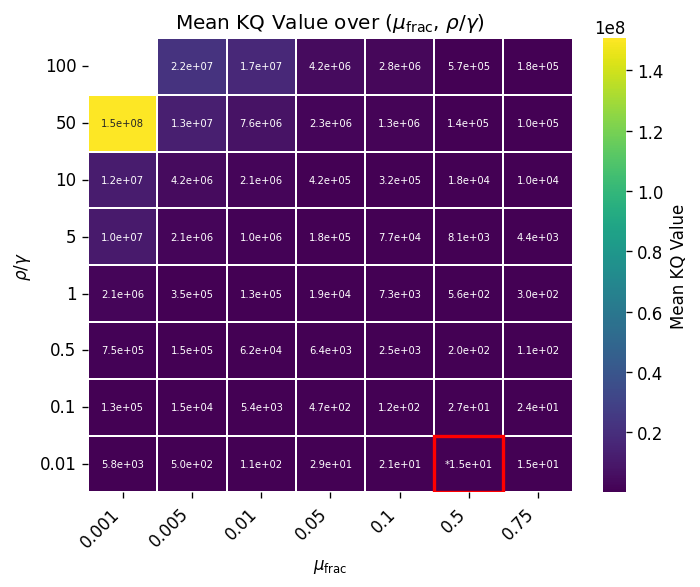

In [9]:
plot_heatmat_grid(df, value="kq_mean")